# Introducción al análisis de series de tiempo con PCA
### Noel Isaías Placencia-Díaz, Erin C. McKiernan, Marco Arieli Herrera-Valdez,
### Facultad de Ciencias, UNAM


## Tabla de contenidos:

[1. Introducción](#introduction)

[1.1 Introducción a PCA](#intro_pca)

[2. Importar EEG](#import_eeg)

[2.1 Colocar los datos de una serie de tiempo multivariada en un dataframe](#eeg_df)

[3. Preprocesamiento - ormalizar la varianza ](#norm_var)

[4. Aplicar PCA ](#apply_pca)

[4.1 Scree Diagram ](#scree)

[4.2 Aplicar PCA reduciendo la dimensión de los datos](#dim_red)

[4.3 Análisis en el espacio de las componentes pricipales](#pca_space)

<a id='introduction'></a>
## 1. Introducción - Series de tiempo multivariadas
Una forma muy efectiva de estudiar series de tiempo es extraer caracerísticas generales y/o patrones en los datos que nos permitan interpretar, clasificar o predecir el comportamiento de dicha serie. Sin embargo, este tipo de análisis puede volverse muy complicado cuando las series de tiempo son $multivariadas$, es decir, que toman en cuenta los cambios en el tiempo de más de una variable$^1$. Un ejemplo sencillo de una serie de tiempo multivariada sería medir el ritmo cardiaco, la actividad muscular y la temperatura corporal de un corredor a lo largo del tiempo, otro ejemplo lo podemos encontrar en los electroencefalogramas (EEG), los cuales registran actividad cerebral en 21, 64 o 256 canales (dependiendo del equipo de registro utilizado), por lo que encontrar patrones en este tipo de series de tiempo mediante métodos estadísticos tradicionales puede resultar complicado.


<a id='intro_pca'></a>
## 1.1 Introducción a Pincipal Component Analysis (PCA)
Principal Component Analysis (PCA) es una herramienta que permite encontrar patrones o características descripitivas en conjuntos de datos multidimensonales y series de tiempo multivaluadas mediante un proceso que resalta características de similitud y diferencia en los datos, además una de las principales ventajas de utilizar PCA es que permite reducir la dimensionalidad de los datos.

El algoritmo de PCA se basa en encontrar cuáles son las direcciones de mayor varianza en el conjunto de datos, estas son llamadas $componentes$ $principales$. Para esto, se siguen los siguientes pasos:

    1) Obtener una matríz de covarianza de los datos.

    2) Extraer los eigenvectores y eigenvalores de la matríz de covarianza.

    3) Dimensión de reduccion: este paso consiste en elegir los eigenvectores cuyos eigenvalores correspondientes son los mayores y crear una nueva matríz sólo con los eigenvectores elegidos, a estos se les llama componentes principales.

    4) Proyectar la matríz de componentes principales sobre los datos originales.

Para aplicar PCA a un conjunto de datos multidimensional utilizaremos datos de un EEG de 21 canales y la paquetería $\textit{scikit-learn}^2$, sin embargo, si quieres aprender un poco más acerca de los detalles matemáticos detrás de PCA, $\textbf{lo cual es muy recomendable}$, puedes hacerlo en el siguiente tutorial: https://klevas.mif.vu.lt/~tomukas/Knygos/principal_components.pdf

##### Notas:
$^1$ Hasta  el momento sólo habíamos estudiado series de tiempo univariadas (como cambios del voltaje en el tiempo)

$^2$ http://scikit-learn.org/stable/

Como es costumbre, primero importaremos las librerías:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='import_eeg'></a>
#### 2. Importamos los datos del EEG:

In [7]:
f = "./eeg_test"

with open(f, "r") as ins:
    headerdata = []
    
    for line in ins:
        headerdata.append((line.split("\t")))

<a id='eeg_df'></a>
#### 2.1 Preparamos un DataFrame
Para series de tiempo multidimensionales, resulta útil tener un DataFrame  de nuestros datos, haremos esto con Pandas en el registro de EEG, en donde por columnas tendremos a cada una de las señales correspondientes a los electrodos y cada renglón corresponde a una "medición" del electroencefalograma:

In [9]:
header = headerdata[0] # en el renglón 21 están los encabezados que corresponden a la localización 
                        # de de los electrodos

df = pd.DataFrame(headerdata[18:1023], #Toma los renglones que incluiremos en el DataFrame
                np.arange(0,len(headerdata[18:1023])) #Índice vertical, correspondiente al tiempo
                  ,header) #Índice horizontal, correspondiente a los electrodos

df.head()# nos muestra los primeros 5 renglones del DataFrame construido

,C3-A1,C4-A1,Cz-A1,F3-A1,F4-A1,F7-A1,F8-A1,Fz-A1,FP1-A1,FP2-A1,...,O1-A1,O2-A1,P3-A1,P4-A1,Pz-A1,T3-A1,T4-A1,T5-A1,T6-A1,A2-A1
0,-678.15448,-272.48465,-269.294586,-347.451172,-316.082184,-246.964142,-89.853477,-317.943054,-246.964142,-429.861145,...,-400.353058,-459.635101,-292.422546,-264.77533,-280.19397,-190.3405,-140.628662,-298.270996,-326.184082,373.237518\n
1,-822.770752,-415.771698,-412.049957,-491.004059,-457.508392,-389.985352,-229.95047,-458.04007,-390.782867,-568.628967,...,-544.969299,-602.390442,-435.177917,-406.201508,-425.07605,-334.956757,-283.91571,-441.292206,-468.673615,232.874695\n
2,-866.899963,-460.432617,-460.432617,-541.513428,-496.58667,-435.443756,-277.003906,-503.232635,-439.697174,-617.011597,...,-591.756897,-649.178101,-482.497223,-455.913361,-474.787903,-381.478516,-329.905823,-492.599091,-516.524597,192.467209\n
3,-808.681274,-400.618896,-402.479767,-484.092255,-441.292206,-376.69342,-220.646103,-445.013947,-383.871063,-555.602844,...,-528.753174,-590.959412,-419.493439,-398.758026,-410.720764,-321.664825,-270.623779,-431.190338,-459.90094,249.888367\n
4,-689.053894,-274.34552,-286.308258,-366.857391,-316.082184,-260.256073,-98.626152,-327.513275,-265.838684,-436.772949,...,-405.935669,-472.129517,-302.524414,-278.067261,-294.017578,-200.974045,-151.528046,-317.677216,-340.805206,375.098389\n


<a id='norm_var'></a>
#### 3. Preprocesamiento - Normalizar la varianza
Para realizar PCA es conveniente que los datos tengan una varianza normalizada, scikit-learn tiene una herramienta que hará esto de manera automatica:

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(df) #ajustamos el escalador a nuestro DataFrame utilizando fit()
scaled_data = scaler.transform(df) #aplica el cambio de escala utilizando transform()

<a id='apply_pca'></a>
#### 4. Aplicación de PCA
Para aplicar PCA con scikit debemos de proceder de forma análoga a cuando aplicamos el escalamiento anterior:

In [12]:
from sklearn.decomposition import PCA
pca_21comp = PCA(n_components=21) #especificamos el número de componentes principales.

In [13]:
pca_21comp.fit(scaled_data) # ajusta el PCA a nuestro DataFrame reescalado

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
data_pca21 = pca_21comp.transform(scaled_data) #aplica PCA

<a id='scree'></a>
#### 4.1 Scree Diagram
Una forma de decidir qué tanto vamos a reducir la dimensión de nuestros datos es usando un $scree$ $diagram$, que simplemente es una gráfica de los eigenvalores correspondientes a cada una de las componentes principales

In [15]:
percent =(pca_21comp.explained_variance_ratio_) # nos indica el porcentaje de varianza 
                                                # correspondiente a cada una de las componentes

Text(0,0.5,'% de varianza explicada')

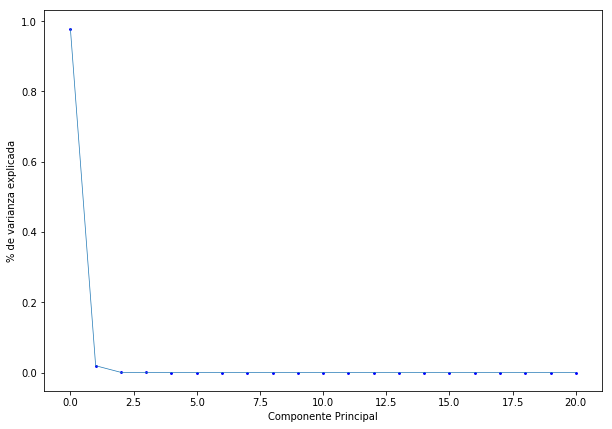

In [16]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(0,21),percent[0:],lw=.7)
plt.scatter(np.arange(0,21),percent[0:],s=3.5,c='b')
plt.xlabel("Componente Principal")
plt.ylabel("% de varianza explicada")

Es possible ver que la primer componente logra capturar alrededor del 97% de la varianza y con las primeras dos componentes principales capturamos .998 de la varianza total. Ahora vamos a reducir la dimensión de los datos a dos dimensiones:

In [17]:
sum(percent[0:2])

0.9985629044909365

<a id='dim_red'></a>
#### 4.2 Aplicar PCA a los datos reduciendo la dimensión

In [18]:
pca_2comp = PCA(n_components=2) #especificamos el número de componentes principales.
pca_2comp.fit(scaled_data) # ajusta el PCA a nuestro DataFrame reescalado
data_2d = pca_2comp.transform(scaled_data) # ajusta el PCA a nuestro DataFrame reescalado
data_2d.shape #verificamos la dimensión de nuestros nuevos datos

(983, 2)

A continuación graficaremos los datos del EEG original en términos de las primeras dos componentes principales:

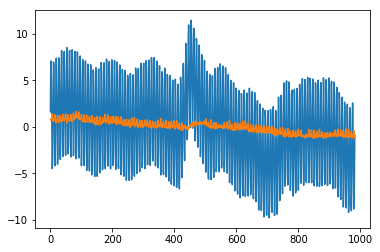

In [22]:
plt.plot(data_2d)

<a id='pca_space'></a>
#### 4.2 Aplicar PCA a los datos reduciendo la dimensión
Una forma de analizar los datos transformados con PCA es mediante un método llamado reconstrucción del espacio fase, cuyo objetivo es analizar las trayectorias del sistema dinámico subyacente a una serie de tiempo construyendo un conjunto $\textit{vectores de estado}$ dados por los datos que corresopnden a las variables de nuestro sistema. Es común que después de reconstruir el espacio fase, se analice la existencia de atractores y se utilicen herramientas para caracterizar a estos mismos. La siguiente gráfica es un ejemplo de la reconstrucción del espacio fase de nuestros datos en términos de las componentes principales, donde la intensidad del color de la línea corresponde a la secuencia temporal de los datos.

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


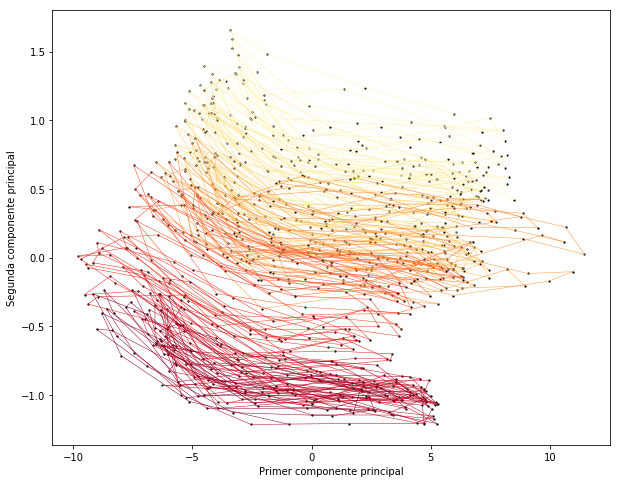

In [19]:
import numpy as np
import matplotlib.pyplot as plt
c = np.arange(1,100)
x = data_2d[:,0]
y = data_2d[:,1]

cm = plt.get_cmap('YlOrRd')

fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(111)

no_points = len((data_2d[:,0]))
ax1.set_color_cycle([cm(1.*i/(no_points-1)) 
                     for i in range(no_points-1)])


for i in range(no_points-1):
    ax1.plot(x[i:i+2],y[i:i+2],lw=.5)

ax1.scatter(data_2d[:,0],data_2d[:,1],marker='.',s=6,c='black')
plt.xlabel('Primer componente principal')
plt.ylabel('Segunda componente principal')
    
plt.show()

La representación anterior en términos del espacio de las componentes principales sugiere un comportamiento oscilatorio en la forma en la que el sistema visita diferentes estados a lo largo del tiempo. En la siguiente gráfica podemos visualizar en qué regiones de este espacio se tienden a concentrar más puntos:

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'kde'
  s)


<function matplotlib.pyplot.tight_layout>

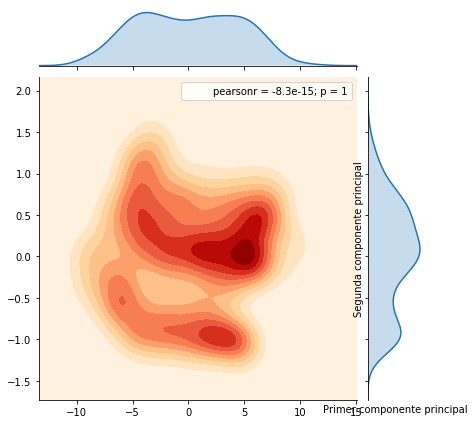

In [20]:
plt.figure(figsize=(10,8))
sns.jointplot(data_2d[:,0],data_2d[:,1],kind='kde',kde=False,cmap='OrRd')
#plt.scatter(data_2d[:,0],data_2d[:,1],s=.2,c='r')
plt.xlabel('Primer componente principal')
plt.ylabel('Segunda componente principal')
plt.tight_layout

¿Qué podría significar el hecho de que la serie de tiempo *prefiera* visitar  ciertas regiones de este espacio con mayor frecuencia que otras?.